## Multiple Linear Regression using Gradient Descent Algorithm

**Regression Analysis** is a process of estimating **relationship** between a dependent variable and one or more independent variables or regressors.

**Multiple Linear Regression** estimates linear relationship between **one** dependent variable and **more than one** independent variables.

**Multivariate Linear regression** estimates linear relationship between **many** dependent variables and **one or more** independent variables.

**Note:** Multiple Linear Regression $\neq$ Multivariate Linear Regression

----

### Linear Model
$$ y=\theta_0x_0+\theta_1x_1+...+\theta_mx_m+\epsilon= \epsilon+\sum_{i=0}^m x_i\theta_i$$  
Where,

|Symbol |Description |
| :---:| :--- |
|$y$ |Dependent Variable  |
|$x_i$  |Predictors / Regressors / Independent Variables <br>($x_0=1$) |
|$\theta_i$ | Parameters / Coefficients of the linear model|
|$\epsilon$ | Prediction Error |


In [1]:
clc
close all
clear all
format long
ver Octave

----------------------------------------------------------------------
GNU Octave Version: 7.1.0 (hg id: 04120d65778a)
GNU Octave License: GNU General Public License
Operating System: MINGW32_NT-6.2 Windows 6.2  x86_64
----------------------------------------------------------------------


### Hypothesis Function / Linear Model
$$ f([x],\{\theta\})=f_i=\sum_{j} x_{ij} \theta_j \Leftrightarrow \{f\}=[X] \{\theta\}$$  
Where,  

|Symbol |Description |
| :---:| :--- |
|$$f([x],\{\theta\})$$ |Vectorized Function estimating Dependent Variable using linear model |
|$x_i$  |Predictors / Regressors / Independent Variables <br>($x_0=1$) |
|$\theta_i$ | Parameters / Coefficients of the linear model|
|$[X]$    |Design Matrix <br>(Ones filled in 1st column)<br>(Each row for a design point) |  
|$\{\theta\}$| Parameter Column Matrix |

In [2]:
function f=hypothesisFunction(X,theta)
  f=X*theta;
endfunction

### Cost Function (Mean Squared Error)
$$ J([X],\{y\},\{\theta\})=\frac{1}{2n}\sum{(f([X]_i,\{\theta\})-y_i)^2} $$
Where,  

|Symbol |Description |
| :---:| :--- |
|$$J([X],\{y\},\{\theta\})$$ |Cost to be minimised. Taken as half of mean squared error. |
|$[x]_i$  |Predictors for $i^{th}$ design point |
|$y_i$    |Target of dependent variable at $i^{th}$ design point |  
|$\{\theta\}$ | Parameters / Coefficients of the linear model|
|$n$ | Number of design points in training |


In [3]:
function J=costFunction(X,y,theta)
   J=sum((hypothesisFunction(X,theta)-y).^2)/(2*length(y));
endfunction

### Gradient Descent Step
Improve current value of $\theta$ by moving towards steepest decent direction of the cost function.
$ \theta^* = \theta - \alpha \nabla{J} $  

$$ \theta_j^*=\theta_j-\frac{\alpha}{n}\sum_i{(f([X]_i,\{\theta\})-y_i)x_{ij}} $$
Where,  

|Symbol |Description |
| :---:| :--- |
|$$\theta_j^*$$ |Next estimate of $j^{th}$ parameter |
|$\theta_j$ | $j^{th}$ parameter |
|$[x]_i$  |Predictors for $i^{th}$ design point |
|$x_{ij}$  |$j^{th}$ Regressor for $i^{th}$ design point |
|$y_i$    |Target of dependent variable at $i^{th}$ design point |  
|$n$ | Number of design points in training dataset|


In [4]:
function thetaNew=gradientDescentStep(X,y,theta,alpha)
  thetaNew=theta-alpha/(length(y))*sum((hypothesisFunction(X,theta)-y).*X)';
endfunction

### Normalize and Denormalize Variables
The transformation helps in numerical stability of the steepest descent algorithm.
$$z^*=\frac{z-\mu_z}{\sigma_z}$$

In [5]:
function z_norm = Normalize(z,mu,sigma)
  z_norm = (z-mu)./sigma;
endfunction

function z = Denormalize(z_norm,mu,sigma)
  z=z_norm.*sigma+mu;
endfunction

### Gradient Descent Iterations
Function returns both regression function and parameters. 

|Variable |Description |
| :---:| :--- |
|X | Design Matrix |
|y | Target / Dependent Variable |
|theta0 |Initial parameters |
|alpha | Learning rate for the algorithm. Hyper-parameter |
|epsilon  |Additional stopping criterion <br> Stops iteration if the change in cost is less than epsilon |
|plotCost |Whether to plot cost function each iteration |

In [6]:
function [f,theta]=LinearRegression_GradientDescent(X, ...
                                                    y, ...
                                                    theta0=[], ...
                                                    alpha=0.1, ...
                                                    maxIterations=1000, ...
                                                    epsilon=1e-6, ...
                                                    plotCost=true)
  % Initialize theta
  if isempty(theta0) || length(theta0)~=size(X,2)+1
      theta0=zeros(size(X,2)+1,1);
  endif
  theta=theta0;
  
  % Normalize Variables
  mu_X=mean(X);
  sigma_X=std(X);
  X_norm=[ones(length(y),1) Normalize(X,mu_X,sigma_X)];
  mu_y=mean(y);
  sigma_y=std(y);
  y_norm=Normalize(y,mu_y,sigma_y);
  
  % Prepare plot
  if plotCost==true
    figure
    title("Performance")
    xlabel("Iteration (epoch)")
    ylabel("Cost (MSE)")
    hold on
  endif
  
  % Initialize loop
  i=0;
  pc=costFunction(X_norm,y_norm,theta);
  while i<=maxIterations
    i=i+1;
    theta=gradientDescentStep(X_norm,y_norm,theta,alpha);
    cc=costFunction(X_norm,y_norm,theta);
    if plotCost==true && i>1
      plot([i-1,i],[pc,cc],'b-o');
      if mod(i,maxIterations/20)==0
        drawnow
      endif
    endif
    
    % Stop loop if change in cost is less than epsilon 
    if i>1 && (pc<cc || pc-cc<epsilon)
      break
    endif
    pc=cc;
  endwhile
  if plotCost==true
    hold off
  endif
  
  % return linear regression function handle
  f=@(X) Denormalize(hypothesisFunction([ones(size(X,1),1) Normalize(X,mu_X,sigma_X)],theta),mu_y,sigma_y);
endfunction

### Main Program
Reads a csv file having last column as the target and performs linear regression analysis.

In [7]:
[fname,fpath]=uigetfile("*.csv");
fileLoc=fullfile(fpath,fname);
Xy=csvread(fileLoc,1,0);
printf("First 10 entries in the file: %s\n",fname)
disp(Xy(1:10,:));
X=Xy(:,1:end-1);
y=Xy(:,end);

First 10 entries in the file: Data_LinearRegression_Xy.csv
     71      5    156    137   1470
     28      0    119    114   1104
     51     41    113     51    934
     82     39    173     78   1366
     54     45    187    108   1532
     92     33     41     46    682
     13     31     81     94    917
     97     36    196     34   1261
     94      0     30      6    343
      9      2    134     85    987


Cost Convergence Plot:


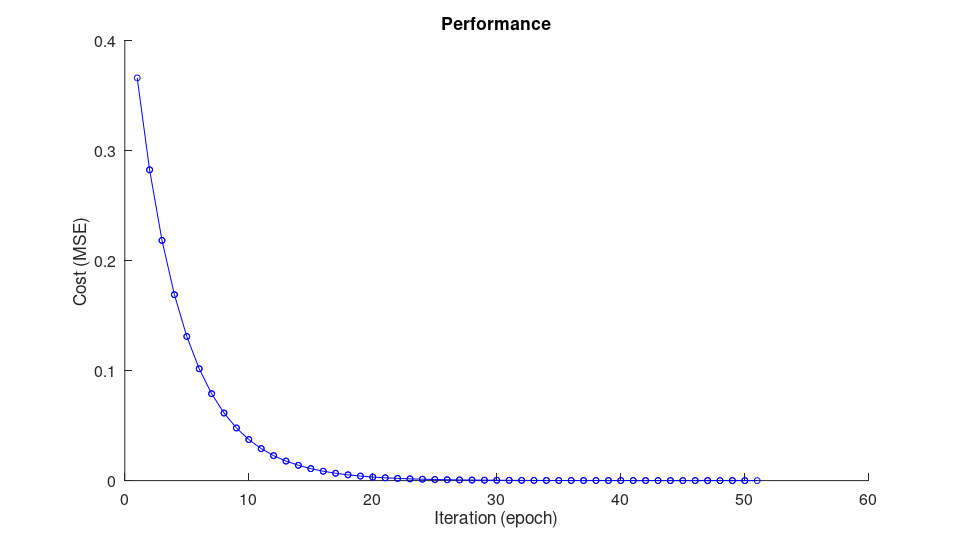

In [8]:
disp("Cost Convergence Plot:")
[linRegF,theta]=LinearRegression_GradientDescent(X,y);

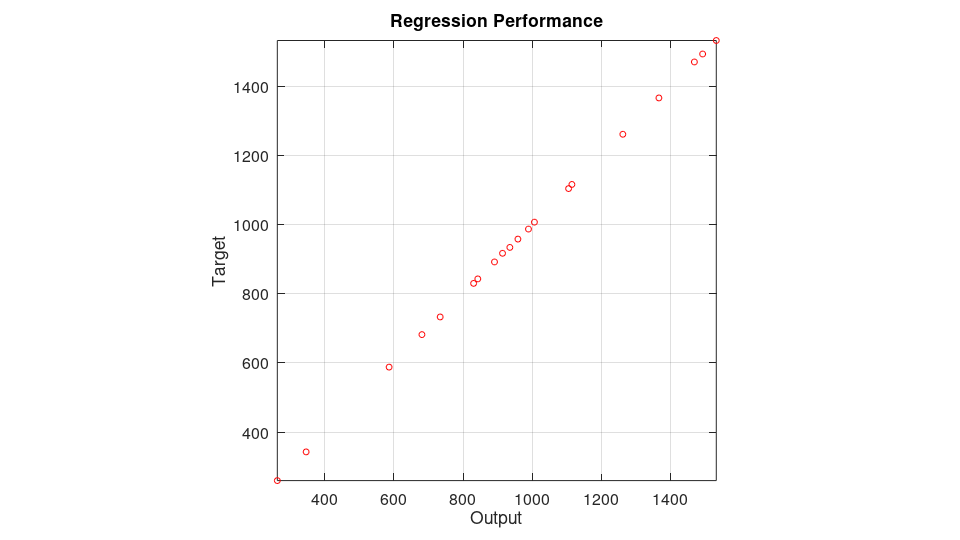

In [9]:
plot(linRegF(X),y,'or');
xlabel("Output");
ylabel("Target");
title("Regression Performance");
grid on;
axis equal tight;

In [10]:
printf("Mean Square Error (MSE) = %g\n",sum((linRegF(X)-y).^2)/length(y))
disp("----------------------------")
disp("10th design point regressors:")
disp(X(10,:))
printf("Predicted value of Dependent Variable = %g\n",linRegF(X(10,:)))
printf("Target value of Dependent Variable = %g\n",y(10))

Mean Square Error (MSE) = 2.44287
----------------------------
10th design point regressors:
     9     2   134    85
Predicted value of Dependent Variable = 988.953
Target value of Dependent Variable = 987
